In [1]:
#DATA EXPLORE

In [2]:
from FremontDataGet.data import get_data
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

plt.style.use('seaborn')

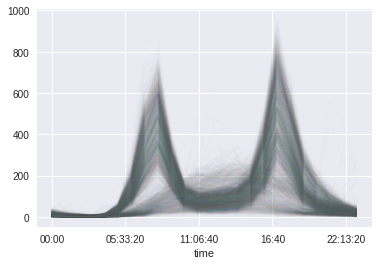

In [3]:
data = get_data()
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.plot(legend=False, alpha = 0.01)

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(2312, 24)

## PRINCIPAL COMPONENT ANALYSIS

In [5]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [6]:
X2.shape

(2312, 2)

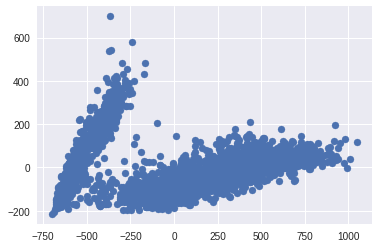

In [7]:
plt.scatter(X2[:,0], X2[:,1])

## UNSUPERVISED CLUSTERING

In [8]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 1, 1])

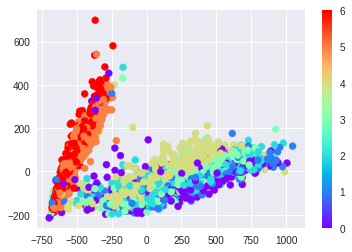

In [9]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(X2[:,0], X2[:,1], c = dayofweek, cmap = 'rainbow')
plt.colorbar()

Text(0.5,1,'Weekend cluster')

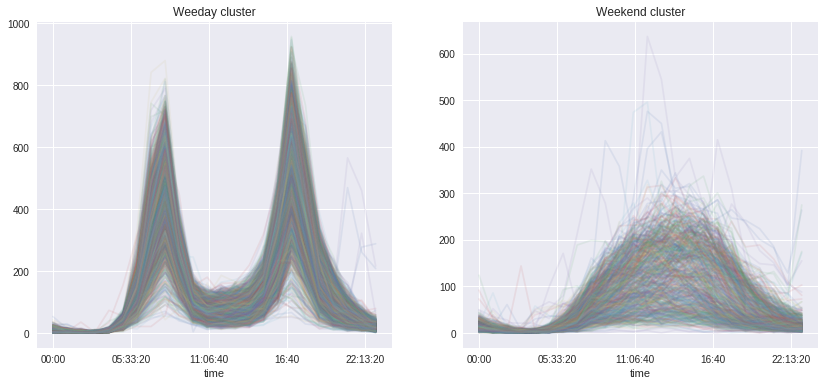

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha = 0.1, ax = ax[1])
pivoted.T[labels == 1].T.plot(legend=False, alpha = 0.1, ax = ax[0])

ax[0].set_title("Weeday cluster")
ax[1].set_title("Weekend cluster")

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01', '2018-05-28', '2018-07-04', '2018-09-03',
               '2018-11-22', '2018-11-23', '2018-12-24', '2018-12-25',
      